<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Lab Series on Network Sciences   
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

## Notebook 4: Introduction to Graph Convolution Networks (GCN)
This Jupyter Notebook is designed to help you grasp the most  different aspects of  Graph Convolution Networks (GCN) seen in the lecture.

##  Normalizing Features with Graph Convolutional Networks
### Simple Example

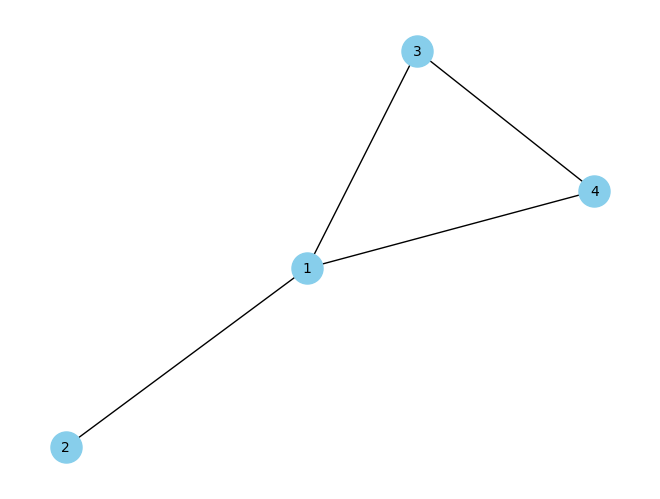

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4])

# Add edges
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(3, 4)

# Visualize the graph
pos = nx.spring_layout(G)  # Positioning of nodes
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_color="black")
plt.show()

### Calculating the Adjacency (A) and Degree Matrix (D)

In [2]:
import numpy as np
# Calculate the adjacency matrix A
A = nx.adjacency_matrix(G).toarray()
print("Adjacency Matrix A:")
print(A)

# Calculate the degree matrix D
# Calculate the degree matrix D
degree_values = list(dict(G.degree()).values())
D = np.diag(degree_values)
print("\nDegree Matrix D:")
print(D)

Adjacency Matrix A:
[[0 1 1 1]
 [1 0 0 0]
 [1 0 0 1]
 [1 0 1 0]]

Degree Matrix D:
[[3 0 0 0]
 [0 1 0 0]
 [0 0 2 0]
 [0 0 0 2]]


### Calculating the Adjacency Matrix with Self-Loop Enforcement (D_delta)

In [3]:

# Define the identity matrix I of the same size as A and D
n = len(degree_values)
I = np.identity(n)

# Calculate A delta (A_delta) and D delta (D_delta)
A_delta = A + I
D_delta = D + I

print("A_delta:")
print(A_delta)

print("\nD_delta:")
print(D_delta)

A_delta:
[[1. 1. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]]

D_delta:
[[4. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 3.]]


### Calculating the Inverse of D_Delta

In [4]:
np.set_printoptions(precision=2)
print("\nD^{-1}:")
print(np.linalg.inv(D))

print("\nD_delta^{-1}:")
print(np.linalg.inv(D_delta))


D^{-1}:
[[0.33 0.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   0.   0.5  0.  ]
 [0.   0.   0.   0.5 ]]

D_delta^{-1}:
[[0.25 0.   0.   0.  ]
 [0.   0.5  0.   0.  ]
 [0.   0.   0.33 0.  ]
 [0.   0.   0.   0.33]]


### Calculating The Normal Normalization

In [5]:
print("\nD^{-1}.A:")
print(np.linalg.inv(D)@ A)


D^{-1}.A:
[[0.   0.33 0.33 0.33]
 [1.   0.   0.   0.  ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.5  0.  ]]


In [6]:
print("\nD_delta^{-1}.A_delta:")
print(np.linalg.inv(D_delta)@ A_delta)


D_delta^{-1}.A_delta:
[[0.25 0.25 0.25 0.25]
 [0.5  0.5  0.   0.  ]
 [0.33 0.   0.33 0.33]
 [0.33 0.   0.33 0.33]]


### Computing The symmetry Normalization

In [7]:
# Compute the symmetric normalization D^(-1/2) * A * D^(-1/2)
D_sqrt_inv = np.diag(1.0 / np.sqrt(np.diag(D)))
A_symmetric = D_sqrt_inv @ A @ D_sqrt_inv

# Print the results with 2 decimal format
np.set_printoptions(precision=2)
print("Symmetric Normalization (D^(-1/2) * A * D^(-1/2)):")
print(A_symmetric)

Symmetric Normalization (D^(-1/2) * A * D^(-1/2)):
[[0.   0.58 0.41 0.41]
 [0.58 0.   0.   0.  ]
 [0.41 0.   0.   0.5 ]
 [0.41 0.   0.5  0.  ]]


## Challenge 1:
Use the karate_club_graph from NetworkX and Compute the Normal Normalization and the Symmetry Normalization Matrices.

- Use the following code for Help

```python
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset
G = nx.karate_club_graph()

# Process labels (Mr. Hi = 0, Officer = 1)
labels = []
for node in G.nodes:
    label = G.nodes[node]['club']
    labels.append(1 if label == 'Officer' else 0)

# Plot graph
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_color=labels,
                 node_size=800,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )
```

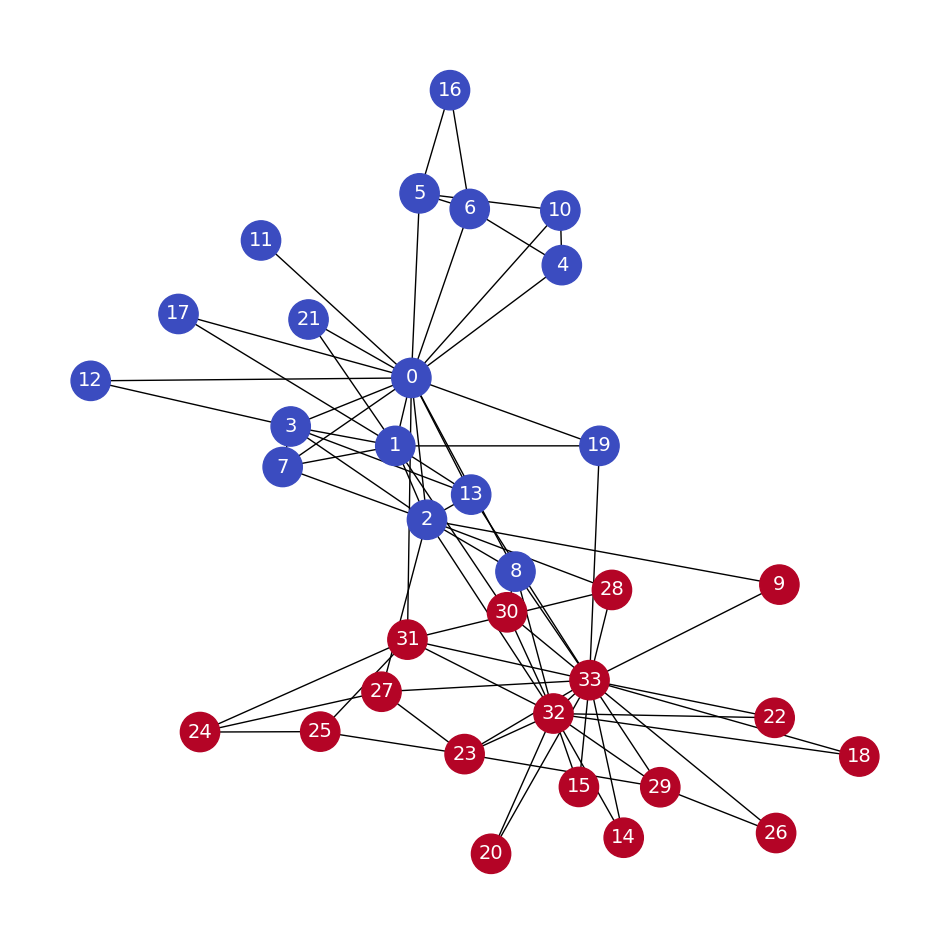

In [8]:
# Your Solution
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset
G = nx.karate_club_graph()

# Process labels (Mr. Hi = 0, Officer = 1)
labels = []
for node in G.nodes:
    label = G.nodes[node]['club']
    labels.append(1 if label == 'Officer' else 0)

# Plot graph
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_color=labels,
                 node_size=800,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

In [9]:
# cqlculqting the adjacency matrix and degree matrix
import numpy as np
# Calculate the adjacency matrix A
A = nx.adjacency_matrix(G).toarray()
print("Adjacency Matrix A:")
print(A)

# Calculate the degree matrix D
degree_values = list(dict(G.degree()).values())
D = np.diag(degree_values)
print("\nDegree Matrix D:")
print(D)

Adjacency Matrix A:
[[0 4 5 ... 2 0 0]
 [4 0 6 ... 0 0 0]
 [5 6 0 ... 0 2 0]
 ...
 [2 0 0 ... 0 4 4]
 [0 0 2 ... 4 0 5]
 [0 0 0 ... 4 5 0]]

Degree Matrix D:
[[16  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0 17]]


In [10]:
# calculating adjacency with self loop and degree with self loop
# Define the identity matrix I of the same size as A and D
n = len(degree_values)
I = np.identity(n)

# Calculate A delta (A_delta) and D delta (D_delta)
A_delta = A + I
D_delta = D + I

print("A_delta:")
print(A_delta)

print("\nD_delta:")
print(D_delta)

A_delta:
[[1. 4. 5. ... 2. 0. 0.]
 [4. 1. 6. ... 0. 0. 0.]
 [5. 6. 1. ... 0. 2. 0.]
 ...
 [2. 0. 0. ... 1. 4. 4.]
 [0. 0. 2. ... 4. 1. 5.]
 [0. 0. 0. ... 4. 5. 1.]]

D_delta:
[[17.  0.  0. ...  0.  0.  0.]
 [ 0. 10.  0. ...  0.  0.  0.]
 [ 0.  0. 11. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  7.  0.  0.]
 [ 0.  0.  0. ...  0. 13.  0.]
 [ 0.  0.  0. ...  0.  0. 18.]]


In [11]:
# normal normalization with delta
print("\nD^{-1}.A:")
print(np.linalg.inv(D)@ A)


D^{-1}.A:
[[0.   0.25 0.31 ... 0.12 0.   0.  ]
 [0.44 0.   0.67 ... 0.   0.   0.  ]
 [0.5  0.6  0.   ... 0.   0.2  0.  ]
 ...
 [0.33 0.   0.   ... 0.   0.67 0.67]
 [0.   0.   0.17 ... 0.33 0.   0.42]
 [0.   0.   0.   ... 0.24 0.29 0.  ]]


In [12]:
#normal normalization with d delta
print("\nD_delta^{-1}.A_delta:")
print(np.linalg.inv(D_delta)@ A_delta)


D_delta^{-1}.A_delta:
[[0.06 0.24 0.29 ... 0.12 0.   0.  ]
 [0.4  0.1  0.6  ... 0.   0.   0.  ]
 [0.45 0.55 0.09 ... 0.   0.18 0.  ]
 ...
 [0.29 0.   0.   ... 0.14 0.57 0.57]
 [0.   0.   0.15 ... 0.31 0.08 0.38]
 [0.   0.   0.   ... 0.22 0.28 0.06]]


In [13]:
# Compute the symmetric normalization D^(-1/2) * A * D^(-1/2)
D_sqrt_inv = np.diag(1.0 / np.sqrt(np.diag(D)))
A_symmetric = D_sqrt_inv @ A @ D_sqrt_inv

# Print the results with 2 decimal format
np.set_printoptions(precision=2)
print("Symmetric Normalization (D^(-1/2) * A * D^(-1/2)):")
print(A_symmetric)

Symmetric Normalization (D^(-1/2) * A * D^(-1/2)):
[[0.   0.33 0.4  ... 0.2  0.   0.  ]
 [0.33 0.   0.63 ... 0.   0.   0.  ]
 [0.4  0.63 0.   ... 0.   0.18 0.  ]
 ...
 [0.2  0.   0.   ... 0.   0.47 0.4 ]
 [0.   0.   0.18 ... 0.47 0.   0.35]
 [0.   0.   0.   ... 0.4  0.35 0.  ]]


## Install the required package

In [14]:
%pip install torch_geometric

Note: you may need to restart the kernel to use updated packages.


## Import the necessary libraries
Downloading the Cora Dataset and Displaying Key Informations about it

In [15]:
# Import necessary libraries
from torch_geometric.datasets import Planetoid
# Download the Cora dataset using Planetoid
dataset = Planetoid(root=".", name="Cora")
# Access the dataset's data
data = dataset[0]

# Print general information about the dataset
print(f'Dataset: {dataset}')
print('---------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {data.x.shape[0]}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Processing...
Done!


Dataset: Cora()
---------------
Number of graphs: 1
Number of nodes: 2708
Number of features: 1433
Number of classes: 7


### Visualizing Node Degrees

<BarContainer object of 37 artists>

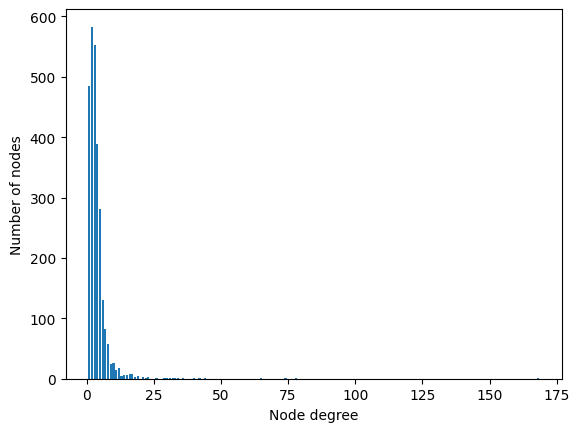

In [16]:

from torch_geometric.utils import degree
from collections import Counter
import matplotlib.pyplot as plt
# Get list of degrees for each node
degrees = degree(data.edge_index[0]).numpy()

# Count the number of nodes for each degree
numbers = Counter(degrees)

# Bar plot
fig, ax = plt.subplots()
ax.set_xlabel('Node degree')
ax.set_ylabel('Number of nodes')
plt.bar(numbers.keys(), numbers.values())

## Implementing GCN model
### Manual GCN Layer Class Implementation

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class GCNLayer(nn.Module):
    def __init__(self, in_features, out_features):
        super(GCNLayer, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = nn.Parameter(torch.FloatTensor(in_features, out_features))
        nn.init.xavier_uniform_(self.weight)

    def forward(self, x, adjacency):
        # Compute symmetric normalization
        degree = torch.sum(adjacency, dim=1)
        degree_sqrt_inv = 1.0 / torch.sqrt(degree)
        D_sqrt_inv = torch.diag(degree_sqrt_inv)
        adjacency = torch.mm(torch.mm(D_sqrt_inv, adjacency), D_sqrt_inv)

        support = torch.mm(x, self.weight)
        output = torch.spmm(adjacency, support)
        return output


### Declaring empty arrays to save validations and accuracies

In [18]:
gcn_train_losses, gcn_val_losses =[], []
gcn_train_accs, gcn_val_accs =[], []

## Implementing the GCN Class using the Manual GCNN Layer Class

In [19]:
class GCN(nn.Module):
    def __init__(self, num_features, num_classes, hidden_dim):
        super(GCN, self).__init__()
        self.gcn1 = GCNLayer(num_features, hidden_dim)
        self.gcn2 = GCNLayer(hidden_dim, num_classes)

    def forward(self, x, adjacency):
         h = self.gcn1(x, adjacency)
         h = torch.relu(h)
         h = self.gcn2(h, adjacency)
         return F.log_softmax(h, dim=1)

    def accuracy(self, y_pred, y_true):
        # Calculate the accuracy of predictions
        return torch.sum(y_pred == y_true) / len(y_true)

    def fit(self, data, epochs, adjacency):
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)

        self.train()
        for epoch in range(epochs + 1):
            optimizer.zero_grad()
            out = self(data.x, adjacency)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = self.accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])

            loss.backward()
            optimizer.step()

            if epoch % 20 == 0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = self.accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')
                # Append the values
                # Append the values
                gcn_train_losses.append(loss.item())
                gcn_val_losses.append(val_loss.item())
                gcn_train_accs.append(acc.item())
                gcn_val_accs.append(val_acc.item())

        return self
    @torch.no_grad()
    def test(self, data, adjacency):
        self.eval()
        out = self(data.x, adjacency)
        return self.accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])


## Create and Train  the GCN model
### Preparing the Adjacency Matrix

In [20]:
from torch_geometric.utils import to_dense_adj

adjacency = to_dense_adj(data.edge_index)[0]
adjacency += torch.eye(len(adjacency))
adjacency

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 1.],
        [0., 0., 0.,  ..., 0., 1., 1.]])

### Training the GCN Model

In [21]:
gcn = GCN(dataset.num_features, 16, dataset.num_classes)
print(gcn)
gcn.fit(data, epochs=100, adjacency=adjacency)
acc = gcn.test(data, adjacency=adjacency)
print(f'\nGCN test accuracy: {acc*100:.2f}%')

GCN(
  (gcn1): GCNLayer()
  (gcn2): GCNLayer()
)
Epoch   0 | Train Loss: 2.774 | Train Acc:  7.14% | Val Loss: 2.76 | Val Acc: 7.80%
Epoch  20 | Train Loss: 0.833 | Train Acc: 98.57% | Val Loss: 1.30 | Val Acc: 72.60%
Epoch  40 | Train Loss: 0.134 | Train Acc: 100.00% | Val Loss: 0.77 | Val Acc: 78.60%
Epoch  60 | Train Loss: 0.044 | Train Acc: 100.00% | Val Loss: 0.71 | Val Acc: 79.00%
Epoch  80 | Train Loss: 0.033 | Train Acc: 100.00% | Val Loss: 0.71 | Val Acc: 80.00%
Epoch 100 | Train Loss: 0.030 | Train Acc: 100.00% | Val Loss: 0.70 | Val Acc: 78.80%

GCN test accuracy: 79.80%


### Testing the Manual GCN model and get accuracy

In [22]:
acc = gcn.test(data, adjacency=adjacency)
print(f'\nGCN test accuracy: {acc*100:.2f}%')


GCN test accuracy: 79.80%


### Visualize the Training and Validation Results

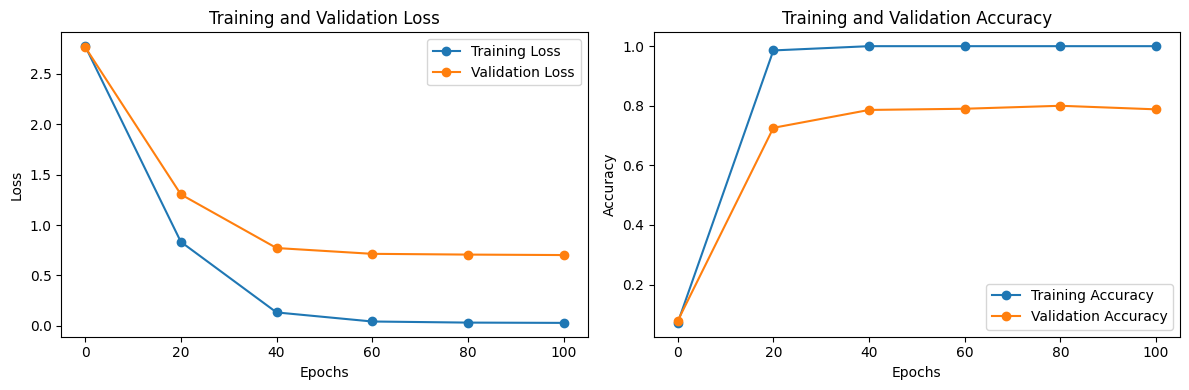

In [23]:

epochs = range(0, 101, 20)  # Assuming training every 20 epochs

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, gcn_train_losses, label='Training Loss', marker='o')
plt.plot(epochs, gcn_val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, gcn_train_accs, label='Training Accuracy', marker='o')
plt.plot(epochs, gcn_val_accs, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Built-In GCN Class Implementation
Using a Built-In implementation from `GCNConv` module of `torch_geometric.nn`

In [24]:
gcn_train_losses, gcn_val_losses =[], []
gcn_train_accs, gcn_val_accs =[], []

In [25]:
import torch
torch.manual_seed(1)
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

dataset = Planetoid(root=".", name="Cora")
data = dataset[0]

def accuracy(y_pred, y_true):
    """Calculate accuracy."""
    return torch.sum(y_pred == y_true) / len(y_true)


class GCN_(torch.nn.Module):
    """Graph Convolutional Network"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gcn1 = GCNConv(dim_in, dim_h)
        self.gcn2 = GCNConv(dim_h, dim_out)

    def forward(self, x, edge_index):
        h = self.gcn1(x, edge_index)
        h = torch.relu(h)
        h = self.gcn2(h, edge_index)
        return F.log_softmax(h, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                      lr=0.01,
                                      weight_decay=5e-4)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1),
                          data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                                  data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                      f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')
                # Append the values
                # Append the values
                gcn_train_losses.append(loss.item())
                gcn_val_losses.append(val_loss.item())
                gcn_train_accs.append(acc.item())
                gcn_val_accs.append(val_acc.item())

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc



In [ ]:
gcn_ = GCN_(dataset.num_features, 16, dataset.num_classes)
print(gcn_)

# Train
gcn_.fit(data, epochs=100)

# Test
acc = gcn_.test(data)
print(f'\nGCN test accuracy: {acc*100:.2f}%\n')

GCN_(
  (gcn1): GCNConv(1433, 16)
  (gcn2): GCNConv(16, 7)
)
Epoch   0 | Train Loss: 1.932 | Train Acc: 15.71% | Val Loss: 1.94 | Val Acc: 15.20%
Epoch  20 | Train Loss: 0.099 | Train Acc: 100.00% | Val Loss: 0.75 | Val Acc: 77.80%
Epoch  40 | Train Loss: 0.014 | Train Acc: 100.00% | Val Loss: 0.72 | Val Acc: 77.20%
Epoch  60 | Train Loss: 0.015 | Train Acc: 100.00% | Val Loss: 0.71 | Val Acc: 77.80%
Epoch  80 | Train Loss: 0.017 | Train Acc: 100.00% | Val Loss: 0.71 | Val Acc: 77.00%
Epoch 100 | Train Loss: 0.016 | Train Acc: 100.00% | Val Loss: 0.71 | Val Acc: 76.40%

GCN test accuracy: 79.70%



### Visualization

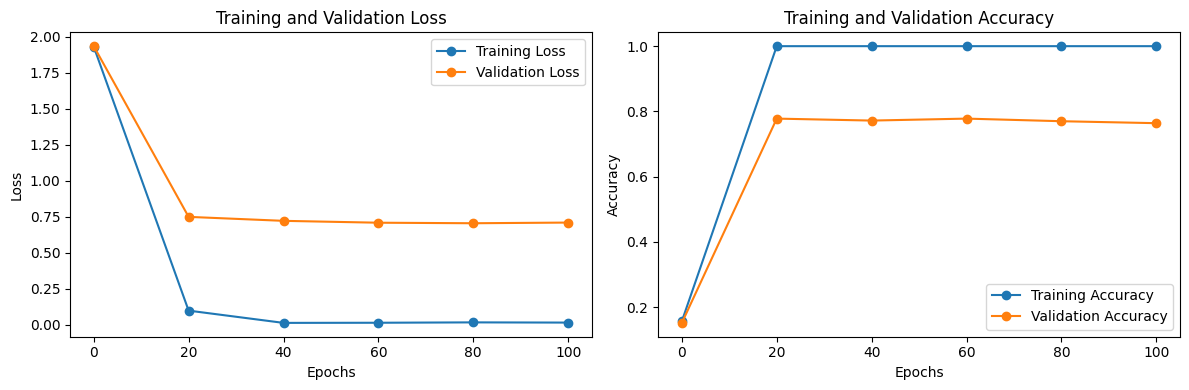

In [27]:

epochs = range(0, 101, 20)  # Assuming training every 20 epochs

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, gcn_train_losses, label='Training Loss', marker='o')
plt.plot(epochs, gcn_val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, gcn_train_accs, label='Training Accuracy', marker='o')
plt.plot(epochs, gcn_val_accs, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Challenge 2:

The Facebook Page-Page dataset This dataset was introduced by Rozemberczki et al. in 2019 [2]. In this dataset, each of the 22,470 nodes represents an official Facebook page.
Pages are connected when there are mutual likes between them. Node features (128-dim vectors) are created from textual descriptions written by the owners of these pages. Our goal is to classify each node into one of four categories: politicians, companies, television shows, and governmental organizations.

The Facebook Page-Page dataset is similar to the Cora dataset: it’s a social network with a node classification task. However, there are three major differences with Cora:
-  The number of nodes is much higher (2,708 versus 22,470)
-  The dimensionality of the node features decreased dramatically (from 1,433 to 128)
-  The goal is to classify each node into four categories instead of seven (which is easier since there are fewer options)

Following the previous steps in implementing the Built-In GCN model for the Cora dataset.
- Build a GCN model for the Facebook Page-Page dataset


`Hint:`

- Unlike Cora, Facebook Page-Page doesn’t have training, evaluation, and test masks by default. We can arbitrarily create masks with the range() function as follows:
```python
data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)
```

- To import the FacebookPagePage Dataset you may use the following code:

```python
from torch_geometric.datasets import FacebookPagePage
```
- Then you can download it using this class:
```python
dataset = FacebookPagePage(root=".")
```

In [28]:
# Your Solution
from torch_geometric.datasets import FacebookPagePage

# Load the Facebook Page-Page dataset
dataset_fsb = FacebookPagePage(root=".")
data = dataset_fsb[0]

# Create training, validation, and test masks
data.train_mask = torch.arange(18000)
data.val_mask = torch.arange(18001, 20000)
data.test_mask = torch.arange(20001, 22470)

Processing...
Done!


In [29]:
print(f"Dataset: {dataset_fsb}")
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of features: {data.num_node_features}")
num_classes = len(data.y.unique())
print(f"Number of classes: {num_classes}")

Dataset: FacebookPagePage()
Number of nodes: 22470
Number of features: 128
Number of classes: 4


In [30]:
gcn_train_losses, gcn_val_losses =[], []
gcn_train_accs, gcn_val_accs =[], []

In [34]:
# Accuracy function
def accuracy(y_pred, y_true):
    """Calculate accuracy."""
    return torch.sum(y_pred == y_true) / len(y_true)

# Define the GCN model
class GCN_(torch.nn.Module):
    """Graph Convolutional Network"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gcn1 = GCNConv(dim_in, dim_h)
        self.gcn2 = GCNConv(dim_h, dim_out)

    def forward(self, x, edge_index):
        h = self.gcn1(x, edge_index)
        h = torch.relu(h)
        h = self.gcn2(h, edge_index)
        return F.log_softmax(h, dim=1)

    def fit(self, data, epochs):
        # Initialize lists to track metrics
        gcn_train_losses, gcn_val_losses = [], []
        gcn_train_accs, gcn_val_accs = [], []

        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                      lr=0.01,
                                      weight_decay=5e-4)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1),
                          data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if epoch % 20 == 0:
                # Validation metrics
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                                  data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                      f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')

                # Append the values to track the loss and accuracy over time
                gcn_train_losses.append(loss.item())
                gcn_val_losses.append(val_loss.item())
                gcn_train_accs.append(acc.item())
                gcn_val_accs.append(val_acc.item())

        # Return the loss and accuracy lists
        return gcn_train_losses, gcn_val_losses, gcn_train_accs, gcn_val_accs

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc






In [35]:
# Instantiate the model
dim_in = dataset.num_node_features  # Number of input features (128-dimensional features in the Facebook dataset)
dim_h = 64  # Hidden layer size
dim_out = dataset.num_classes  # Number of output classes (4 classes for Facebook Pages)
model = GCN_(dim_in, dim_h, dim_out)
# Train the model
epochs = 200
gcn_train_losses, gcn_val_losses, gcn_train_accs, gcn_val_accs = model.fit(data, epochs)

# Test the final model
test_acc = model.test(data)
print(f'Test Accuracy: {test_acc:.4f}')

Epoch   0 | Train Loss: 1.951 | Train Acc:  6.43% | Val Loss: 1.95 | Val Acc: 12.20%
Epoch  20 | Train Loss: 0.006 | Train Acc: 100.00% | Val Loss: 0.81 | Val Acc: 77.40%
Epoch  40 | Train Loss: 0.006 | Train Acc: 100.00% | Val Loss: 0.79 | Val Acc: 77.00%
Epoch  60 | Train Loss: 0.012 | Train Acc: 100.00% | Val Loss: 0.72 | Val Acc: 77.80%
Epoch  80 | Train Loss: 0.011 | Train Acc: 100.00% | Val Loss: 0.73 | Val Acc: 77.20%
Epoch 100 | Train Loss: 0.010 | Train Acc: 100.00% | Val Loss: 0.73 | Val Acc: 77.00%
Epoch 120 | Train Loss: 0.009 | Train Acc: 100.00% | Val Loss: 0.74 | Val Acc: 76.80%
Epoch 140 | Train Loss: 0.008 | Train Acc: 100.00% | Val Loss: 0.74 | Val Acc: 77.20%
Epoch 160 | Train Loss: 0.008 | Train Acc: 100.00% | Val Loss: 0.74 | Val Acc: 77.20%
Epoch 180 | Train Loss: 0.008 | Train Acc: 100.00% | Val Loss: 0.74 | Val Acc: 77.80%
Epoch 200 | Train Loss: 0.007 | Train Acc: 100.00% | Val Loss: 0.74 | Val Acc: 78.00%
Test Accuracy: 0.8050


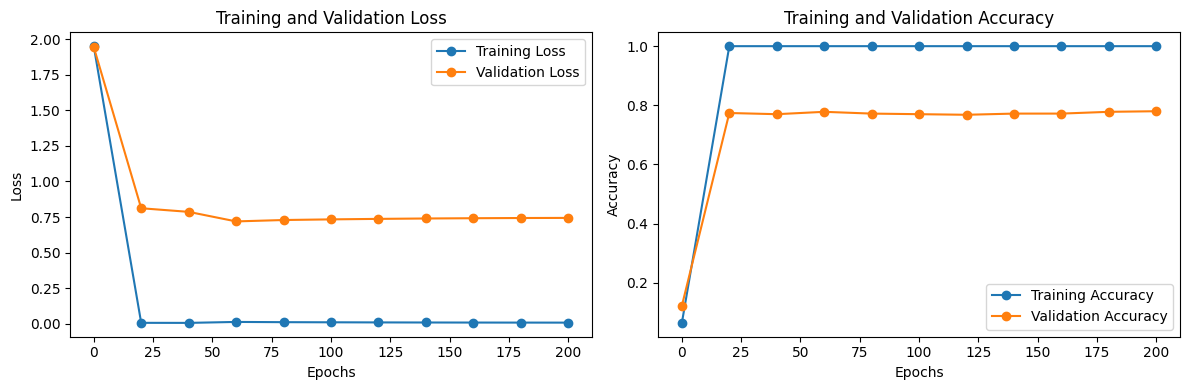

In [37]:
import matplotlib.pyplot as plt

# Assuming you've trained for 200 epochs
epochs = range(0, 201, 20)  # Adjusting to every 20 epochs

# Plot training and validation loss
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, gcn_train_losses, label='Training Loss', marker='o')
plt.plot(epochs, gcn_val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, gcn_train_accs, label='Training Accuracy', marker='o')
plt.plot(epochs, gcn_val_accs, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Challenge 3:
Create a DeepGCN class that updates the architecture of the GCN model (built-in)  to include 4 hidden layers while maintaining proper layer sizes, activation functions, and connectivity. See if the new Architecture provide better results for both the Cora and Facebook Datasets.

Here are some guidelines to help you achieve this:

- Create additional GCNConv layers to expand the depth of the model. You'll need to add two more layers to make a total of four hidden layers.

- Make sure each new GCNConv layer takes input from the previous layer and propagates it to the next layer. You should maintain the flow of information and keep it consistent with the original architecture.

- Ensure that the dimensions (number of output features) of the layers are suitable for your dataset and task. You might need to adjust these dimensions to achieve the desired performance.

- Use appropriate activation functions (e.g., ReLU) after each layer to introduce non-linearity into the model.

- Don't forget to update the forward method to include the new layers in the forward pass.



In [41]:
torch.manual_seed(1)

class DeepGCN(torch.nn.Module):
    def __init__(self, dim_in, dim_h1, dim_h2, dim_h3, dim_h4, dim_out):
        super(DeepGCN, self).__init__()
        
        # Define the layers
        self.gcn1 = GCNConv(dim_in, dim_h1)
        self.gcn2 = GCNConv(dim_h1, dim_h2)
        self.gcn3 = GCNConv(dim_h2, dim_h3)
        self.gcn4 = GCNConv(dim_h3, dim_h4)
        self.gcn5 = GCNConv(dim_h4, dim_out)
        
    def forward(self, x, edge_index):
        # Pass through the layers with ReLU activation between each
        x = self.gcn1(x, edge_index)
        x = F.relu(x)
        x = self.gcn2(x, edge_index)
        x = F.relu(x)
        x = self.gcn3(x, edge_index)
        x = F.relu(x)
        x = self.gcn4(x, edge_index)
        x = F.relu(x)
        x = self.gcn5(x, edge_index)
        return F.log_softmax(x, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)

        self.train()
        
        # Store loss and accuracy values for visualization
        train_losses, val_losses = [], []
        train_accs, val_accs = [], []

        for epoch in range(epochs + 1):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = self.accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            # Store training and validation metrics for plotting
            if epoch % 20 == 0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = self.accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])

                train_losses.append(loss.item())
                val_losses.append(val_loss.item())
                train_accs.append(acc.item())
                val_accs.append(val_acc.item())

                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')

        # Plot training and validation loss
        self.plot_metrics(train_losses, val_losses, train_accs, val_accs)

    def accuracy(self, y_pred, y_true):
        # Calculate accuracy
        return torch.sum(y_pred == y_true) / len(y_true)

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        acc = self.accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

    def plot_metrics(self, train_losses, val_losses, train_accs, val_accs):
        epochs = range(0, len(train_losses) * 20, 20)  # Plot every 20 epochs

        # Plot training and validation loss
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.plot(epochs, train_losses, label='Training Loss', marker='o')
        plt.plot(epochs, val_losses, label='Validation Loss', marker='o')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Plot training and validation accuracy
        plt.subplot(1, 2, 2)
        plt.plot(epochs, train_accs, label='Training Accuracy', marker='o')
        plt.plot(epochs, val_accs, label='Validation Accuracy', marker='o')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()


#### For Cora

Epoch   0 | Train Loss: 1.944 | Train Acc: 12.14% | Val Loss: 1.95 | Val Acc: 10.80%
Epoch  20 | Train Loss: 0.016 | Train Acc: 100.00% | Val Loss: 1.64 | Val Acc: 73.60%
Epoch  40 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 1.95 | Val Acc: 76.20%
Epoch  60 | Train Loss: 0.003 | Train Acc: 100.00% | Val Loss: 1.47 | Val Acc: 77.00%
Epoch  80 | Train Loss: 0.002 | Train Acc: 100.00% | Val Loss: 1.40 | Val Acc: 76.20%
Epoch 100 | Train Loss: 0.002 | Train Acc: 100.00% | Val Loss: 1.31 | Val Acc: 76.20%
Epoch 120 | Train Loss: 0.002 | Train Acc: 100.00% | Val Loss: 1.26 | Val Acc: 76.60%
Epoch 140 | Train Loss: 0.002 | Train Acc: 100.00% | Val Loss: 1.21 | Val Acc: 77.00%
Epoch 160 | Train Loss: 1.237 | Train Acc: 50.71% | Val Loss: 1.41 | Val Acc: 50.00%
Epoch 180 | Train Loss: 0.068 | Train Acc: 99.29% | Val Loss: 1.51 | Val Acc: 73.20%
Epoch 200 | Train Loss: 0.011 | Train Acc: 99.29% | Val Loss: 2.41 | Val Acc: 73.40%


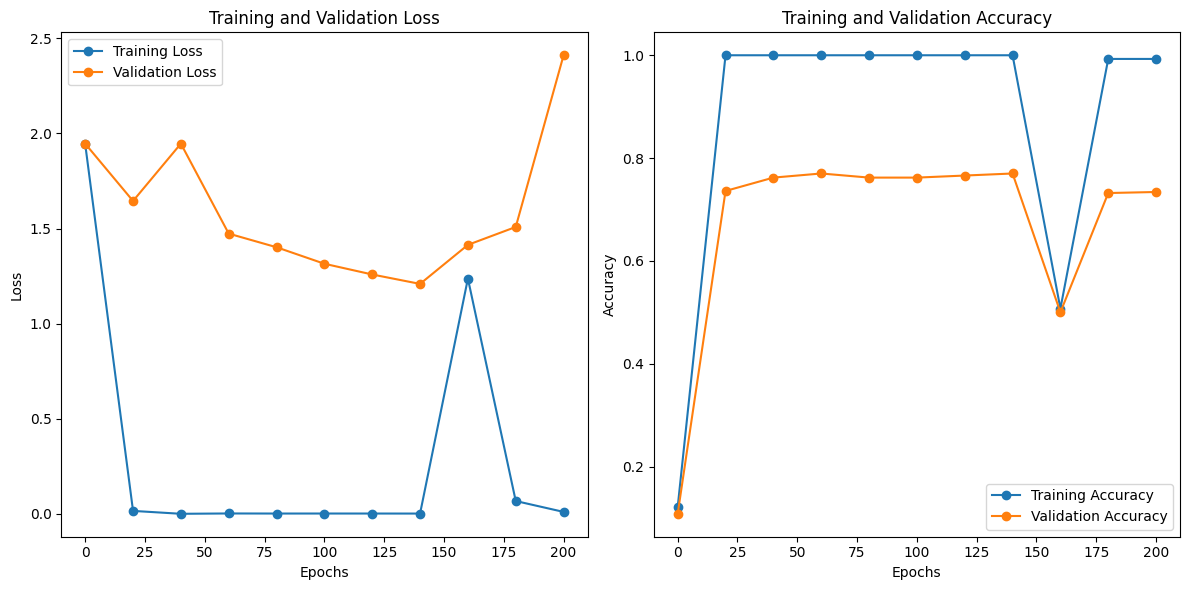

Test Accuracy: 0.7760


In [42]:
# Load Cora dataset
dataset = Planetoid(root=".", name="Cora")
data = dataset[0]

# Initialize DeepGCN model
model = DeepGCN(dim_in=dataset.num_node_features, dim_h1=256, dim_h2=128, dim_h3=64, dim_h4=32, dim_out=dataset.num_classes)

# Train the model
model.fit(data, epochs=200)

# Test the model
test_acc = model.test(data)
print(f'Test Accuracy: {test_acc:.4f}')

#### For Facebook

Epoch   0 | Train Loss: 1.370 | Train Acc: 31.04% | Val Loss: 1.37 | Val Acc: 31.32%
Epoch  20 | Train Loss: 0.271 | Train Acc: 91.93% | Val Loss: 0.26 | Val Acc: 92.50%
Epoch  40 | Train Loss: 0.200 | Train Acc: 94.04% | Val Loss: 0.20 | Val Acc: 94.15%
Epoch  60 | Train Loss: 0.245 | Train Acc: 92.72% | Val Loss: 0.24 | Val Acc: 92.15%
Epoch  80 | Train Loss: 0.178 | Train Acc: 94.83% | Val Loss: 0.18 | Val Acc: 94.55%
Epoch 100 | Train Loss: 0.158 | Train Acc: 95.51% | Val Loss: 0.17 | Val Acc: 95.10%
Epoch 120 | Train Loss: 0.305 | Train Acc: 91.51% | Val Loss: 0.30 | Val Acc: 91.00%
Epoch 140 | Train Loss: 0.206 | Train Acc: 94.03% | Val Loss: 0.21 | Val Acc: 94.05%
Epoch 160 | Train Loss: 0.197 | Train Acc: 94.08% | Val Loss: 0.21 | Val Acc: 93.70%
Epoch 180 | Train Loss: 0.159 | Train Acc: 95.56% | Val Loss: 0.17 | Val Acc: 95.00%
Epoch 200 | Train Loss: 0.148 | Train Acc: 95.80% | Val Loss: 0.16 | Val Acc: 95.15%


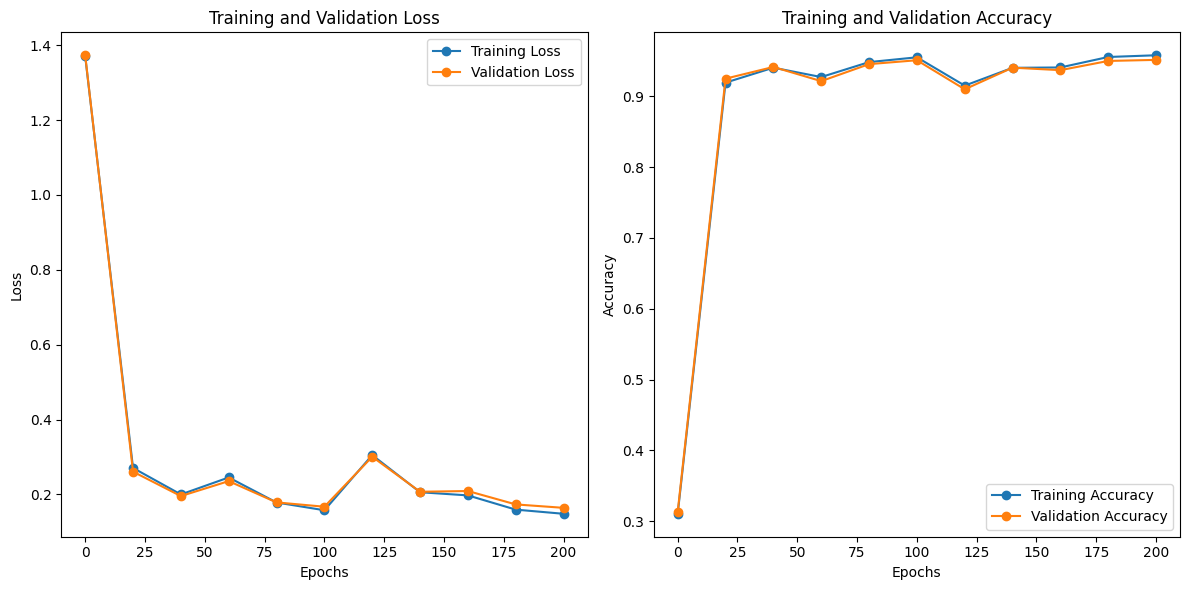

Test Accuracy (Facebook): 0.9441


In [43]:
# Load Facebook Page-Page dataset
dataset_fsb = FacebookPagePage(root=".")
data = dataset_fsb[0]

# Create train, validation, and test masks
data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)

# Initialize DeepGCN model
model_fsb = DeepGCN(dim_in=dataset_fsb.num_node_features, dim_h1=256, dim_h2=128, dim_h3=64, dim_h4=32, dim_out=4)

# Train the model
model_fsb.fit(data, epochs=200)

# Test the model
test_acc_fsb = model_fsb.test(data)
print(f'Test Accuracy (Facebook): {test_acc_fsb:.4f}')
